## 1. Import Libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_function
from IPython.display import display, HTML

In [13]:
def display_html(size=3, content='content'):
    display(HTML(f"<h{size}>{content}</h{size}>"))

In [14]:
def rotate_xlabel(ax, angle=35):
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=angle,
        ha='right'
    )

def rotate_ylabel(ax, angle=35):
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=angle,
    )

## 2. Reading the Data

In [15]:
file_path = r"C:\\Users\\Vitthal Namdev\\flight-price-prediction\train.csv"
train = pd.read_csv(file_path)
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-24,Kolkata,Banglore,20:00:00,20:45:00,1485,1.0,In-flight meal not included,10844
1,Goair,2019-04-03,Banglore,Delhi,07:45:00,10:40:00,175,0.0,No Info,4239
2,Indigo,2019-03-27,Kolkata,Banglore,05:30:00,08:20:00,170,0.0,No Info,4148
3,Jet Airways,2019-03-18,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4160
4,Jet Airways,2019-05-09,Delhi,Cochin,15:00:00,12:35:00,1295,1.0,In-flight meal not included,12373


### 2.1 Fixing Data Types

In [16]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [17]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:,col],dayfirst=True,
                        format='mixed')
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [18]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-24,Kolkata,Banglore,2024-07-20 20:00:00,2024-07-20 20:45:00,1485,1.0,In-flight meal not included,10844
1,Goair,2019-04-03,Banglore,Delhi,2024-07-20 07:45:00,2024-07-20 10:40:00,175,0.0,No Info,4239
2,Indigo,2019-03-27,Kolkata,Banglore,2024-07-20 05:30:00,2024-07-20 08:20:00,170,0.0,No Info,4148
3,Jet Airways,2019-03-18,Mumbai,Hyderabad,2024-07-20 10:20:00,2024-07-20 11:50:00,90,0.0,In-flight meal not included,4160
4,Jet Airways,2019-05-09,Delhi,Cochin,2024-07-20 15:00:00,2024-07-20 12:35:00,1295,1.0,In-flight meal not included,12373


In [19]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-24,Kolkata,Banglore,2024-07-20 20:00:00,2024-07-20 20:45:00,1485,1.0,In-flight meal not included,10844
1,Goair,2019-04-03,Banglore,Delhi,2024-07-20 07:45:00,2024-07-20 10:40:00,175,0.0,No Info,4239
2,Indigo,2019-03-27,Kolkata,Banglore,2024-07-20 05:30:00,2024-07-20 08:20:00,170,0.0,No Info,4148
3,Jet Airways,2019-03-18,Mumbai,Hyderabad,2024-07-20 10:20:00,2024-07-20 11:50:00,90,0.0,In-flight meal not included,4160
4,Jet Airways,2019-05-09,Delhi,Cochin,2024-07-20 15:00:00,2024-07-20 12:35:00,1295,1.0,In-flight meal not included,12373


## 3. High-level Summary of Data

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [21]:
train.describe(include=[np.number])

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,639.414062,0.809375,9068.109375
std,513.333799,0.676851,5170.379441
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5000.000000
50%,492.500000,1.000000,8040.000000
75%,930.000000,1.000000,12373.000000
max,2315.000000,3.000000,57209.000000


In [22]:
(
    train
    .assign(total_stops=train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,227,279,279,333.0,487


## 4 High-level analysis of MISSING values

In [35]:
eda_helper_function.missing_info(train)

,count,percentage
variable,,


- There is no missing values, but for visualization we use titanic dataset

In [30]:
df = pd.read_csv('C:\\Users\\Vitthal Namdev\\flight-price-prediction\\data\\train.csv')
df.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-05-27,Delhi,Cochin,02:00:00,07:25:00,325,1.0,No Info,7164
1,Air India,2019-05-18,Delhi,Cochin,17:40:00,08:15:00,875,1.0,No Info,8361
2,Multiple Carriers,2019-06-12,Delhi,Cochin,08:45:00,19:00:00,615,1.0,No Info,11789
3,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info,13067
4,Air Asia,2019-06-06,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,8759


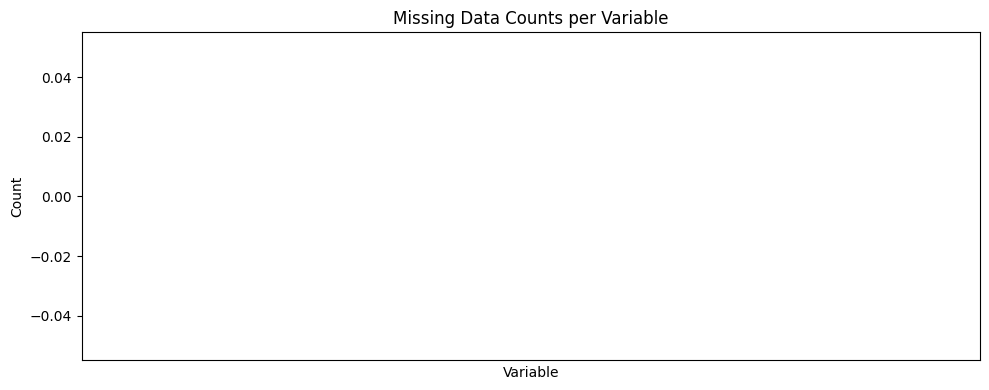

In [34]:
eda_helper_function.plot_missing_info(df)

## 5. High-level analysis of Outliers

In [36]:
from sklearn.ensemble import IsolationForest
forest = IsolationForest(n_estimators=10, random_state=42)

In [37]:
(
    train
    .assign(outlier=forest.fit_predict(
        train
        .drop(columns='price')
        .select_dtypes(include=[np.number])
    ))
    .query('outlier==-1')  # query is used for filteration
    .duration
    .describe()
)

count     249.000000
mean      907.771084
std       652.865853
min        75.000000
25%       195.000000
50%      1165.000000
75%      1460.000000
max      2315.000000
Name: duration, dtype: float64

## 6. Pair Plots

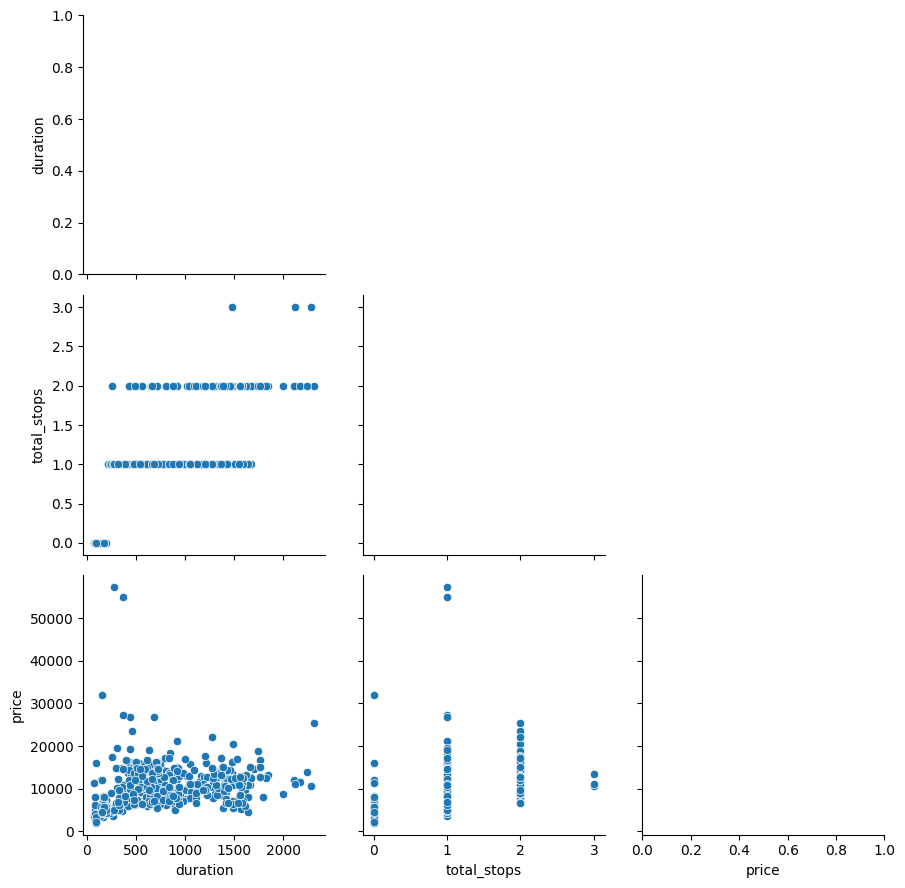

In [38]:
eda_helper_function.pair_plots(train)

- some sort of linear relation b/w price and duration
- when no stop then duration is zero, when stops increases duration also increases
- there is no significant dependent of price and total_stops

In [39]:
def rotate_ylabels(ax, angle=0):
  ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=angle
  )

def rotate_xlabels(ax, angle=35):
  ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=angle,
        ha="right"
    )

## 7. Correlation Analysis

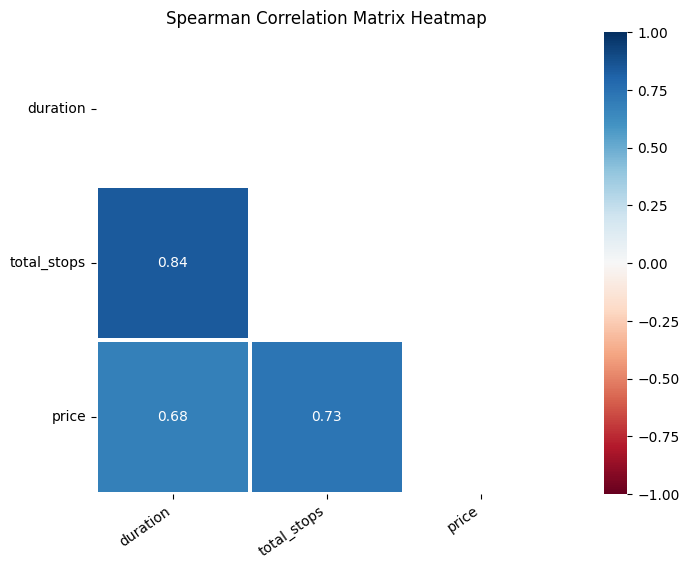

In [40]:
eda_helper_function.correlation_heatmap(train)

In [41]:

ct = pd.crosstab(
    train.loc[:,'airline'],
    train.loc[:,'source']
)
print(ct.shape)
print(ct.sum().sum())
ct

(8, 5)
640


source,Banglore,Chennai,Delhi,Kolkata,Mumbai
airline,,,,,
Air Asia,2,0,2,6,0
Air India,18,0,52,32,13
Goair,9,0,2,1,0
Indigo,33,11,57,32,10
Jet Airways,46,0,96,71,14
Multiple Carriers,0,0,61,0,0
Spicejet,3,8,4,20,6
Vistara,11,4,5,10,1


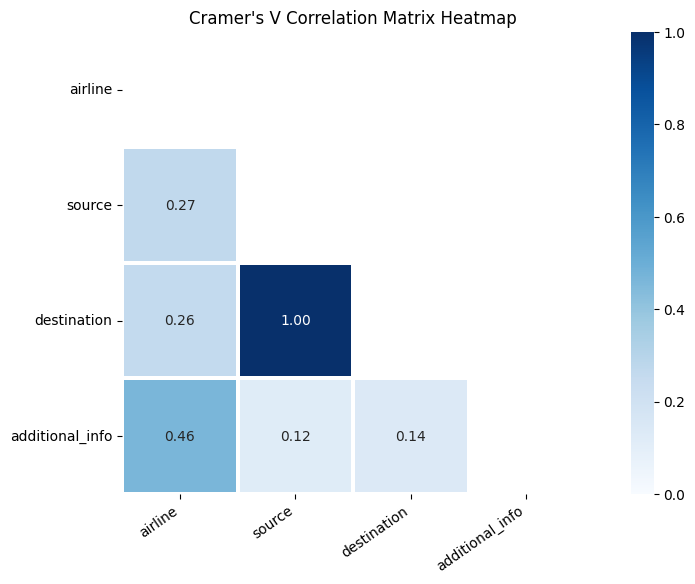

In [42]:
eda_helper_function.cramersV_heatmap(train)

- due to overlapping of cities b/w source and destination correlation is 1

## 8. Detailed Analysis

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


### 8.1 airline

In [44]:
train.airline

0            Jet Airways
1                  Goair
2                 Indigo
3            Jet Airways
4            Jet Airways
             ...        
635          Jet Airways
636    Multiple Carriers
637          Jet Airways
638               Indigo
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [45]:
eda_helper_function.cat_summary(train, 'airline')

0            Jet Airways
1                  Goair
2                 Indigo
3            Jet Airways
4            Jet Airways
             ...        
635          Jet Airways
636    Multiple Carriers
637          Jet Airways
638               Indigo
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,227


,count,percentage
category,,
Jet Airways,227,0.354687
Indigo,143,0.223438
Air India,115,0.179688
Multiple Carriers,61,0.095312
Spicejet,41,0.064062
Vistara,31,0.048438
Goair,12,0.018750
Air Asia,10,0.015625


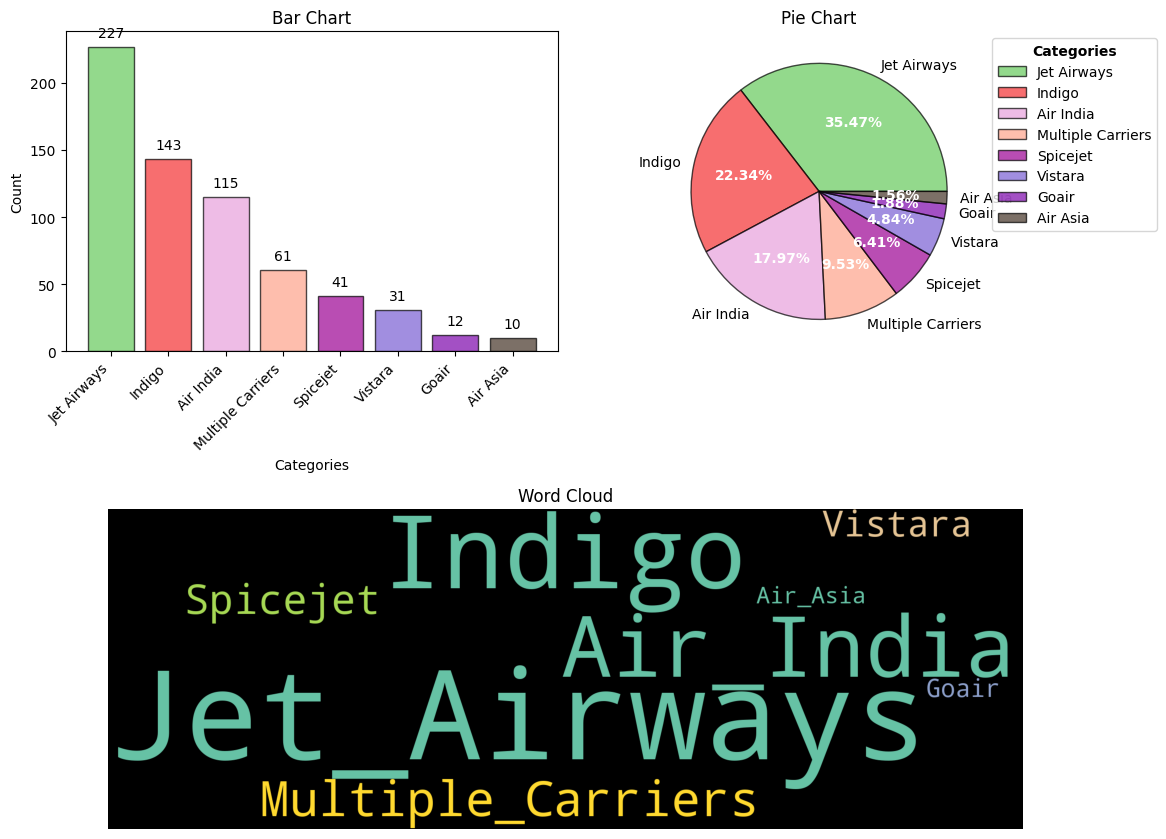

In [25]:
eda_helper_function.cat_univar_plots(train, 'airline')

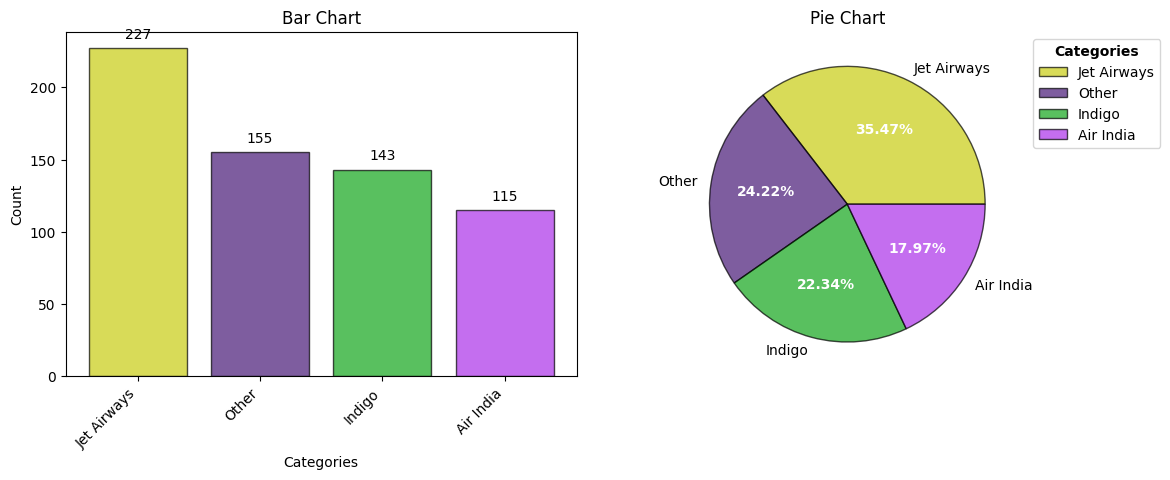

In [46]:
eda_helper_function.cat_univar_plots(train, 'airline',show_wordcloud=False, k=3)

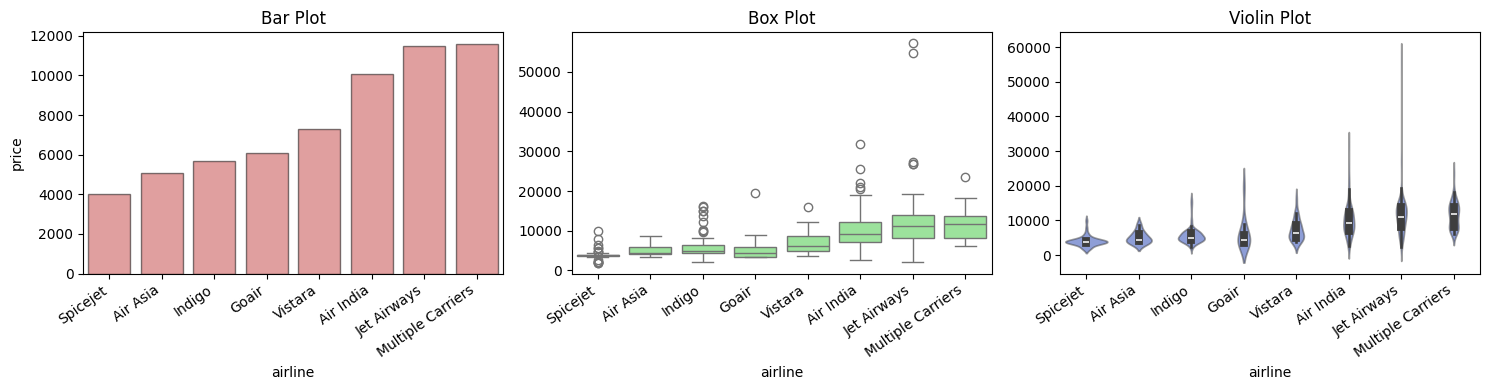

In [47]:
eda_helper_function.num_cat_bivar_plots(
    data=train,
    num_var='price',
    cat_var='airline'
)

- through bar plot(y-axis = mean() price) we directly say airline is good feature for price prediction. because it directly increases from left to right
- in case of boxplot (just take airindia where box says 50% observation pays 5000 to 15000
- in Violine plot, (just take spicejet it look similar to normal but slightly +vely skewed). in each airline the shape of violinplot is different the we say airline depend upon price 

## Voiline PLOT

A violin plot is a method of plotting numeric data and can be used to understand the distribution and density of the data. It combines aspects of a box plot and a KDE (Kernel Density Estimate) plot, providing a comprehensive view of the data. Here are the key reasons why violin plots are important and useful:

    Detailed Distribution Visualization:
        Density Information: Violin plots show the full distribution of the data across different categories, highlighting where the data points are concentrated. This density estimation is provided by the KDE plot, which gives a smooth curve over the data points.
        Symmetry and Skewness: The shape of the violin plot can show whether the data is symmetric or skewed. This is useful for understanding the underlying distribution characteristics.

    Comparison Across Categories:
        Side-by-Side Comparison: Violin plots allow for easy comparison of distributions across different categories. Multiple violin plots can be displayed side by side, making it straightforward to compare the distributions.
        Outliers and Variability: While box plots provide some information about variability and outliers, violin plots enhance this by showing the distribution shape and density, which provides more context about the spread and concentration of the data.

    Combination of Summary Statistics:
        Combines Box Plot Elements: Violin plots often include elements of box plots, such as the median, quartiles, and outliers. This combination offers a summary of the central tendency and variability while also presenting the detailed distribution.
        Visualizing Multiple Peaks: Violin plots can display multimodal distributions (distributions with multiple peaks), which are not easily detected using box plots alone.

    Data Insight and Patterns:
        Identifying Patterns: By showing the distribution of the data, violin plots help in identifying patterns, such as whether different groups have similar or different distributions.
        Comparative Insights: The ability to compare distributions can provide insights into differences between groups, which is useful in various fields such as biology, finance, and social sciences.

Example and Context

In a dataset such as the Iris dataset, a violin plot could be used to compare the distribution of petal_length across different species. This would show if certain species have longer or shorter petals on average and how the lengths are distributed within each species.
Conclusion

Violin plots are a powerful tool for exploratory data analysis because they provide a richer understanding of the data distribution compared to other plots. They are particularly useful when you want to compare the distribution of a continuous variable across different categories or groups, giving insight into both central tendency and variability.


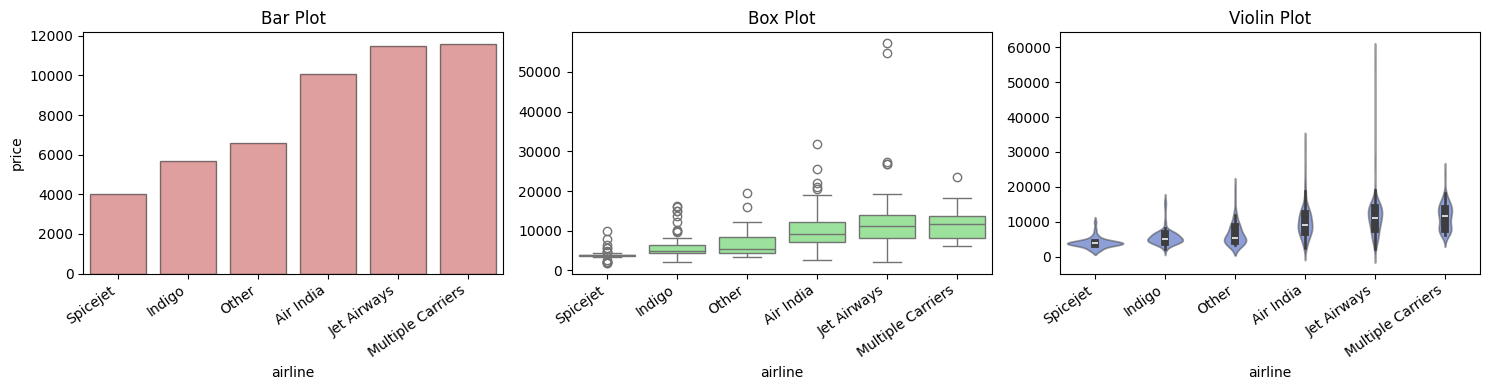

In [48]:
eda_helper_function.num_cat_bivar_plots(data=train,
                                        num_var='price',
                                        cat_var='airline',
                                        k=5
                                       )

In [49]:
eda_helper_function.num_cat_hyp_testing(train, 'price', 'airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 36.34560360169341
- p-value              : 9.11079458346313e-43
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 280.8267095937006
- p-value              : 7.480756084124025e-57
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- **FacetGrid is helpfull for Multivariate analysis**

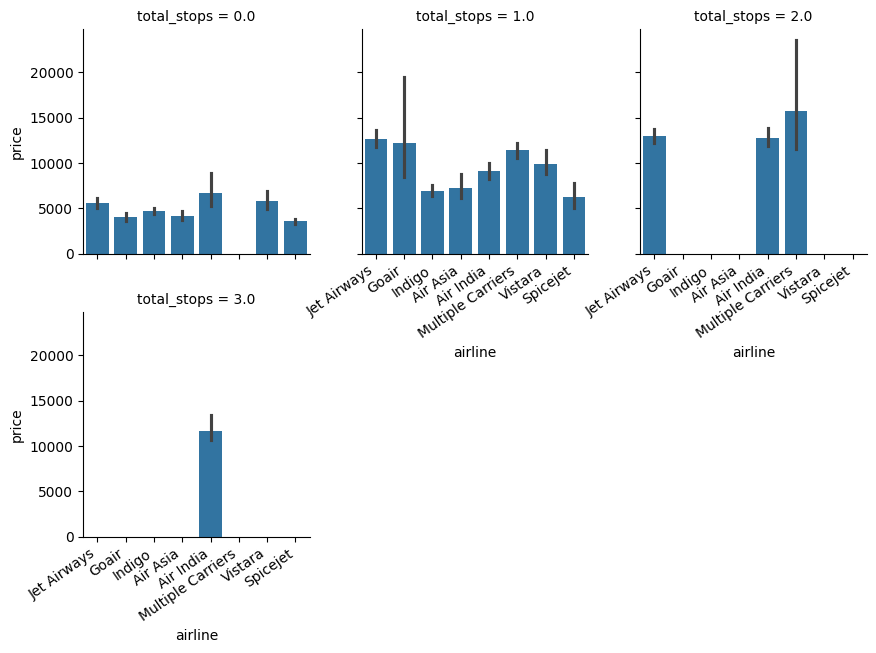

In [50]:
airline_grid = sns.FacetGrid(
    data=train,
    col='total_stops',
    col_wrap=3
)

airline_grid.map(sns.barplot, 'airline', 'price', order=train.airline.unique())

for ax in airline_grid.axes[1:]:
    eda_helper_function.rotate_xlabels(ax)
# plt.tight_layout()

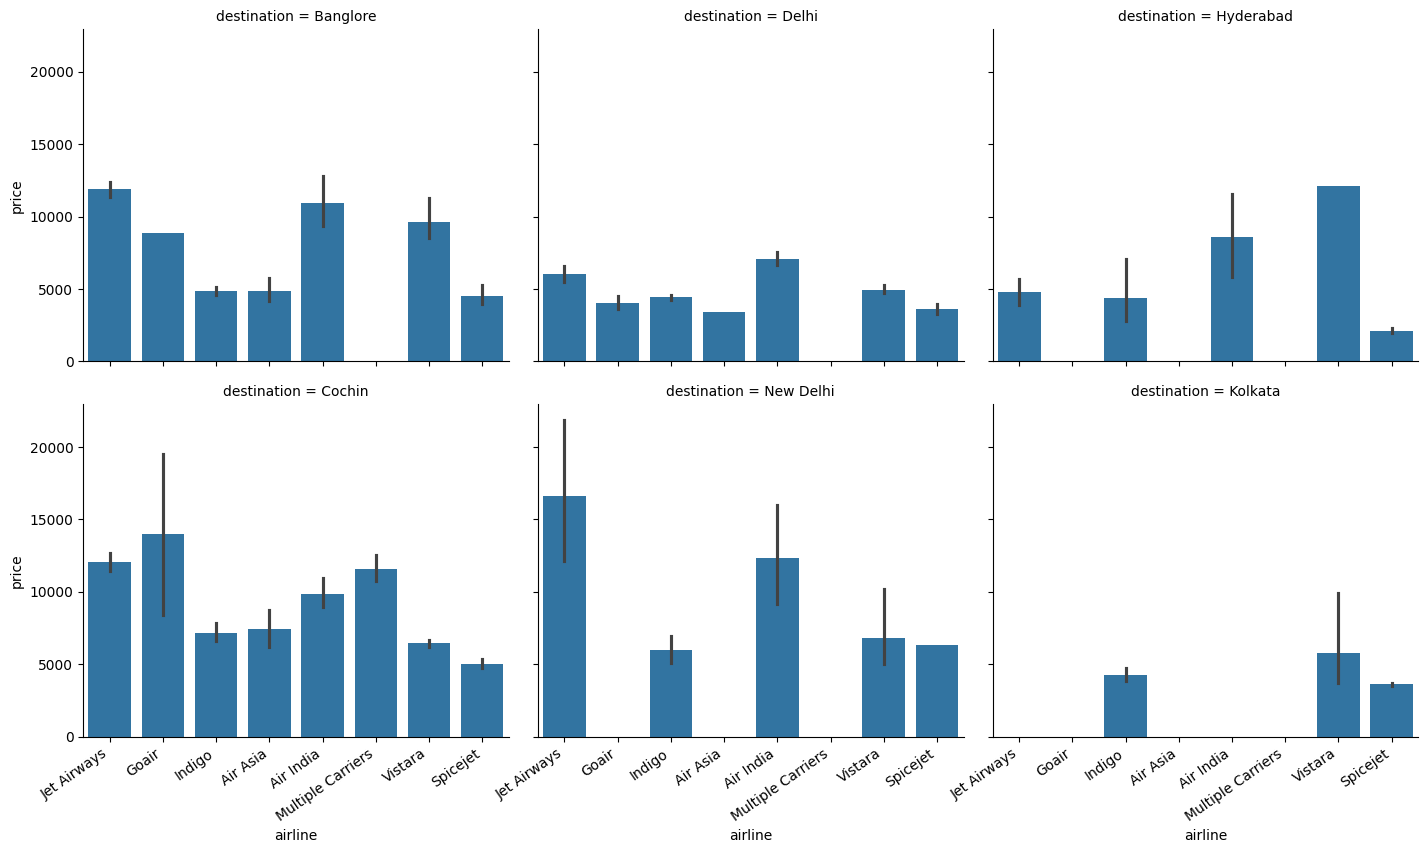

In [31]:
airline_grid = sns.FacetGrid(
    data=train,
    col='destination',
    col_wrap=3,
    height=4,
    aspect=1.2, # means length=aspect * height
    sharey=True
)

airline_grid.map(sns.barplot, 'airline', 'price', order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_function.rotate_xlabels(ax)

In [51]:
train['price'].mean()

9068.109375

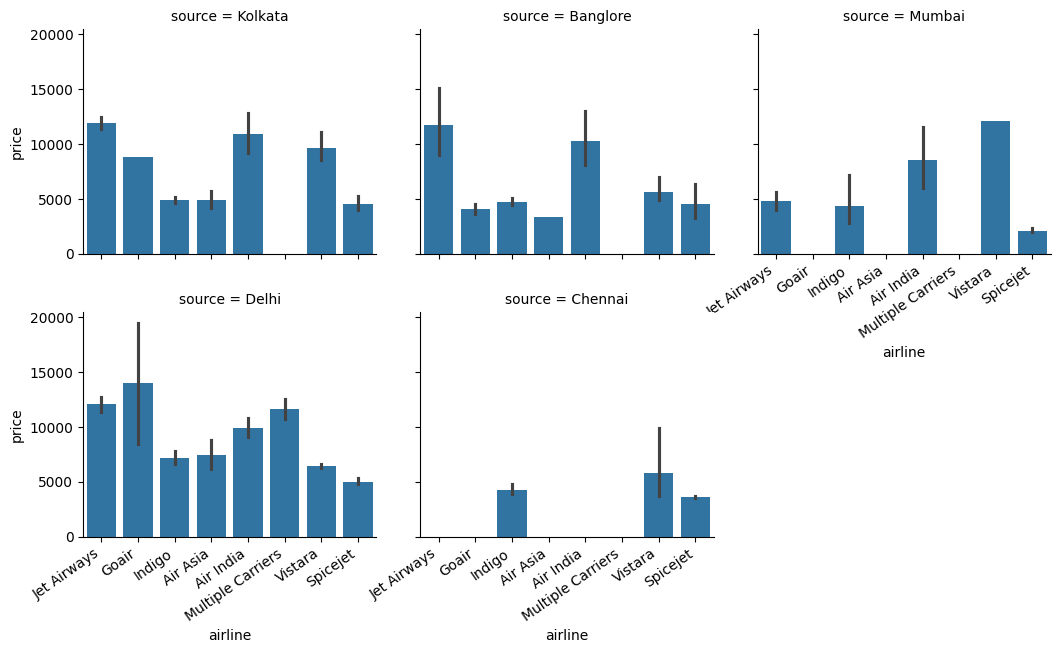

In [52]:
airline_grid = sns.FacetGrid(
    data=train,
    col='source',
    col_wrap=3,
    height=3,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot, 'airline', 'price', order=train.airline.unique())

for ax in airline_grid.axes[2:]:
    eda_helper_function.rotate_xlabels(ax)

- **Error Bars**: The error bars on the plot represent the variability or standard deviation of the prices for each airline. Longer error bars indicate higher variability, meaning the prices are more spread out. Shorter error bars indicate lower variability, meaning the prices are more consistent.
- **Price Distribution**: Higher variability in ticket prices means that there are significant differences in prices, potentially due to factors like demand, flight availability, booking times, and class of service. Lower variability suggests that the airline maintains more consistent pricing regardless of these factors.

Specific Observations from the Plot:

- **Jet Airways**: Shows high variability across all source cities, indicating that their ticket prices can range widely from low to high. This might be due to a mix of different service classes, booking times, or demand fluctuations.
- **Goair, Indigo, Air Asia, Spicejet**: Generally show low variability, indicating more stable and consistent pricing, likely reflecting their low-cost carrier model.
- **Air India, Vistara**: Show moderate to high variability, suggesting a range of service options and pricing strategies that lead to greater price dispersion.
- **Multiple Carriers**: As the name suggests, this category shows significant variability, likely because it aggregates data from various airlines with different pricing strategies.

### Importance of Understanding Variability:

- Decision Making: Helps consumers and businesses make informed decisions based on the predictability or fluctuation of prices.
- Pricing Strategy: Airlines can adjust their pricing strategies by understanding where there is high variability and where more consistent pricing might benefit them.
- Market Analysis: Provides insights into the competitive landscape and helps identify which airlines are more consistent in their pricing versus those that have a wide range of prices.

## 8.2 Date_Of_Journey

In [34]:
train.head(2)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-24,Kolkata,Banglore,2024-06-19 20:00:00,2024-06-19 20:45:00,1485,1.0,In-flight meal not included,10844
1,Goair,2019-04-03,Banglore,Delhi,2024-06-19 07:45:00,2024-06-19 10:40:00,175,0.0,No Info,4239


In [35]:
train.date_of_journey

0     2019-05-24
1     2019-04-03
2     2019-03-27
3     2019-03-18
4     2019-05-09
         ...    
635   2019-03-18
636   2019-05-24
637   2019-03-24
638   2019-06-09
639   2019-05-15
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

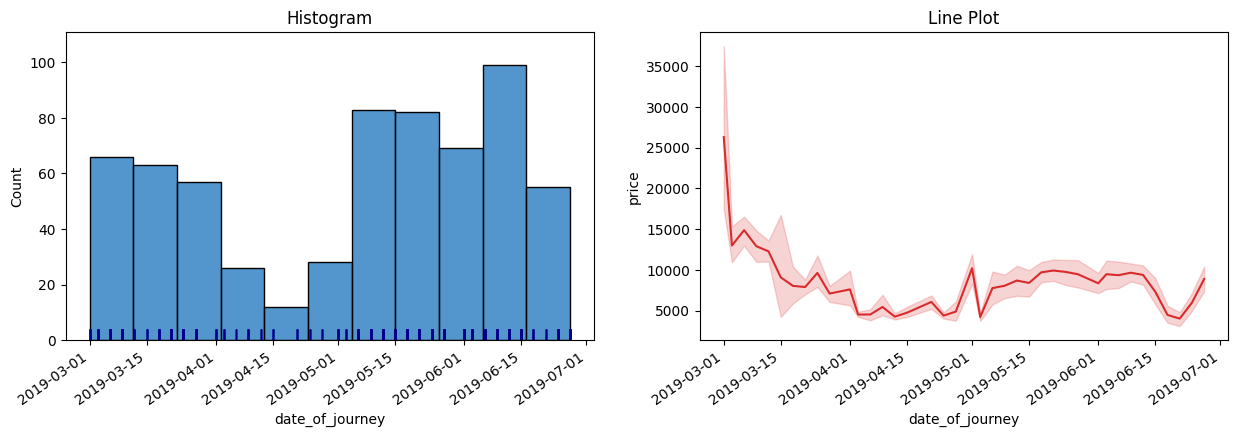

In [36]:
eda_helper_function.dt_univar_plots(
    data=train,
    var='date_of_journey',
    target='price'
)

### Bivariate Analysis

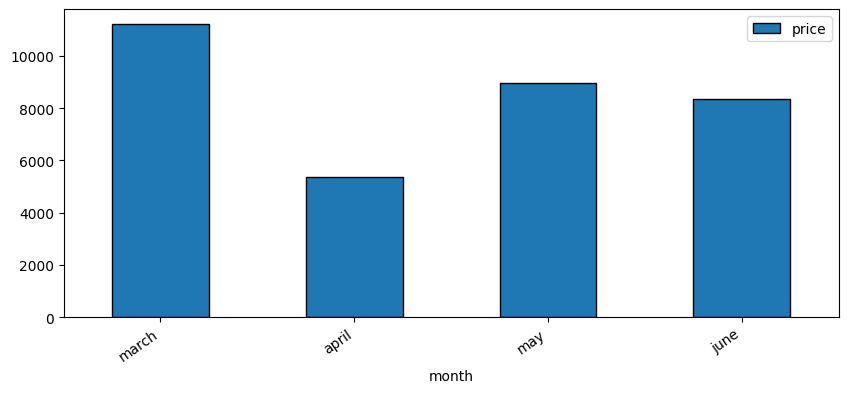

In [37]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey', freq='M'))
    .price.mean()
    .to_frame()
    .set_axis(['march', 'april', 'may', 'june'])
    .rename_axis(index='month')
    .plot(
        kind='bar',
        figsize=(10,4),
        edgecolor='black'
    )
)

ax = plt.gca()
eda_helper_function.rotate_xlabels(ax)

- Through this graph we figured out price is depend on month

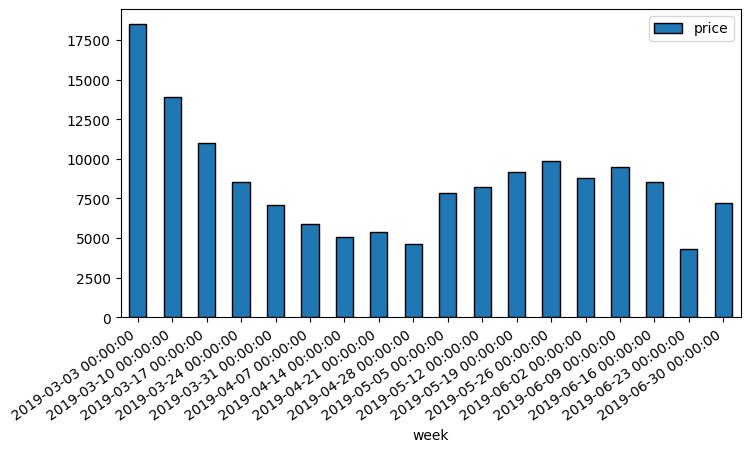

In [53]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey', freq='W'))
    .price.mean()
    .to_frame()
    .rename_axis(index='week')
    .plot(
        kind='bar',
        figsize=(8,4),
        edgecolor='black')
    
)
ax = plt.gca()
eda_helper_function.rotate_xlabels(ax)

- In the 1st week of march, price mean is too high than other week of this month. in the same we visulaize the other month

### Multivariate Analysis

- average price of flight from given source in particular month

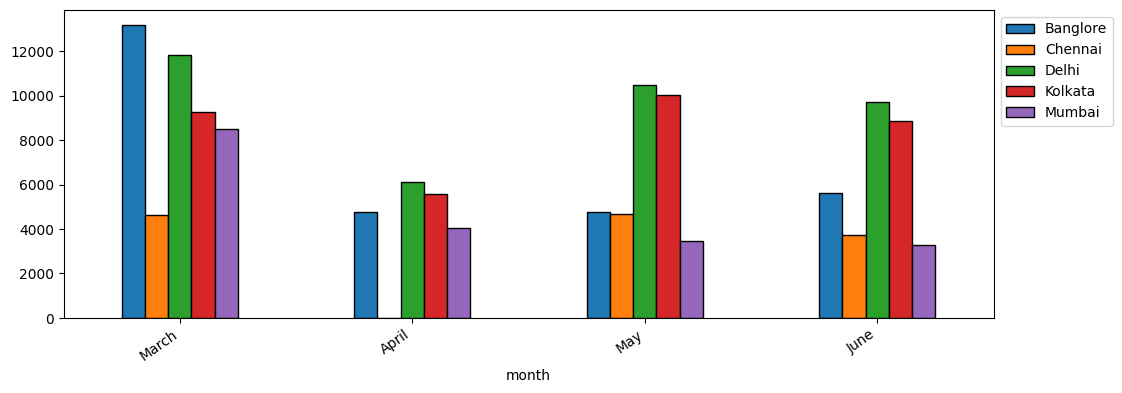

In [54]:
(
    train
    .groupby([pd.Grouper(key='date_of_journey', freq='M'), 'source'])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(['March', 'April', 'May', 'June'], axis=0)
    .rename_axis(index='month')
    .plot(
        kind='bar',
        figsize=(12,4),
        edgecolor='black'
    )
)

ax = plt.gca()
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1,1)
)
rotate_xlabel(ax)

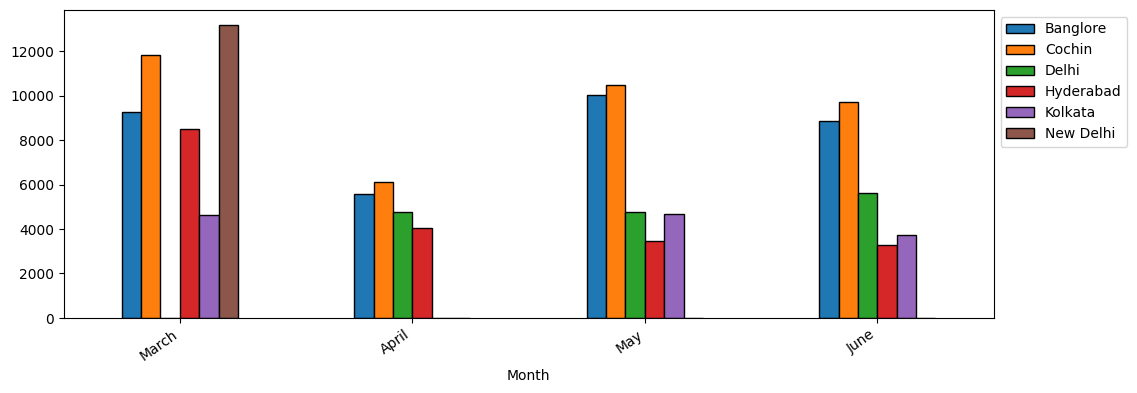

In [57]:
(
    train
    .groupby([pd.Grouper(key='date_of_journey', freq='M'), 'destination'])
    .price.mean()
    .unstack(fill_value=0) # each month ke under different source
    .set_axis(['March', 'April', 'May', 'June'], axis=0)
    .rename_axis(index='Month')
    .plot(
        kind='bar',
        figsize=(12,4),
        edgecolor='black'
    )
)

ax = plt.gca()
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1,1)
)

eda_helper_function.rotate_xlabels(ax)

## 8.3 dep_time

In [58]:
train.head(2)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-24,Kolkata,Banglore,2024-07-20 20:00:00,2024-07-20 20:45:00,1485,1.0,In-flight meal not included,10844
1,Goair,2019-04-03,Banglore,Delhi,2024-07-20 07:45:00,2024-07-20 10:40:00,175,0.0,No Info,4239


In [42]:
train.dep_time

0     2024-06-19 20:00:00
1     2024-06-19 07:45:00
2     2024-06-19 05:30:00
3     2024-06-19 10:20:00
4     2024-06-19 15:00:00
              ...        
635   2024-06-19 16:55:00
636   2024-06-19 19:00:00
637   2024-06-19 15:50:00
638   2024-06-19 21:00:00
639   2024-06-19 18:55:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

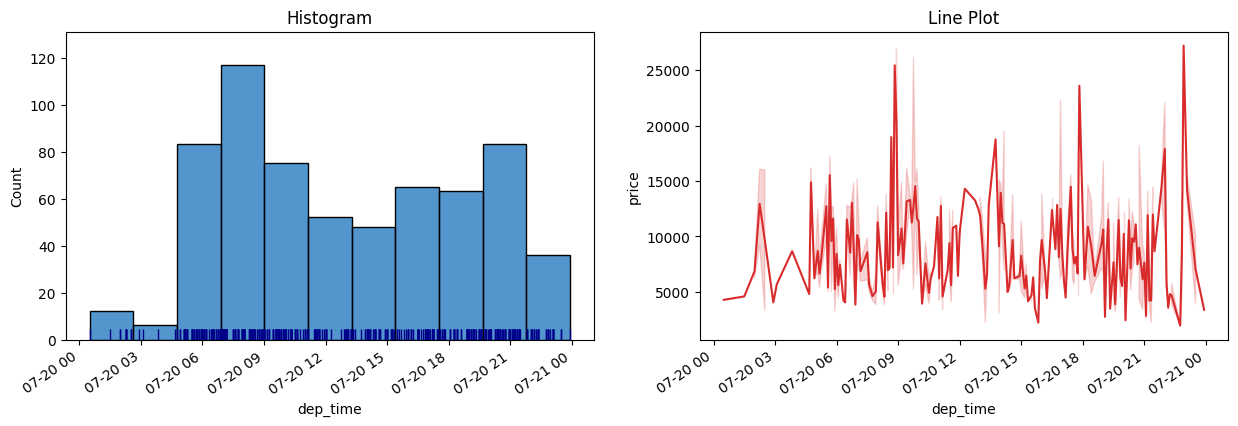

In [59]:
eda_helper_function.dt_univar_plots(train, 'dep_time', 'price')

- From these plot we look the booking for dep_time 6:00 am to 12:00 pm is much high than price is high 
- dep_time 12:00 pm to 15:00 pm is booking of flight is decreases than again than price dcreases
- dep_time 15:00 pm to 21:00 pm booking again increases than price is increases

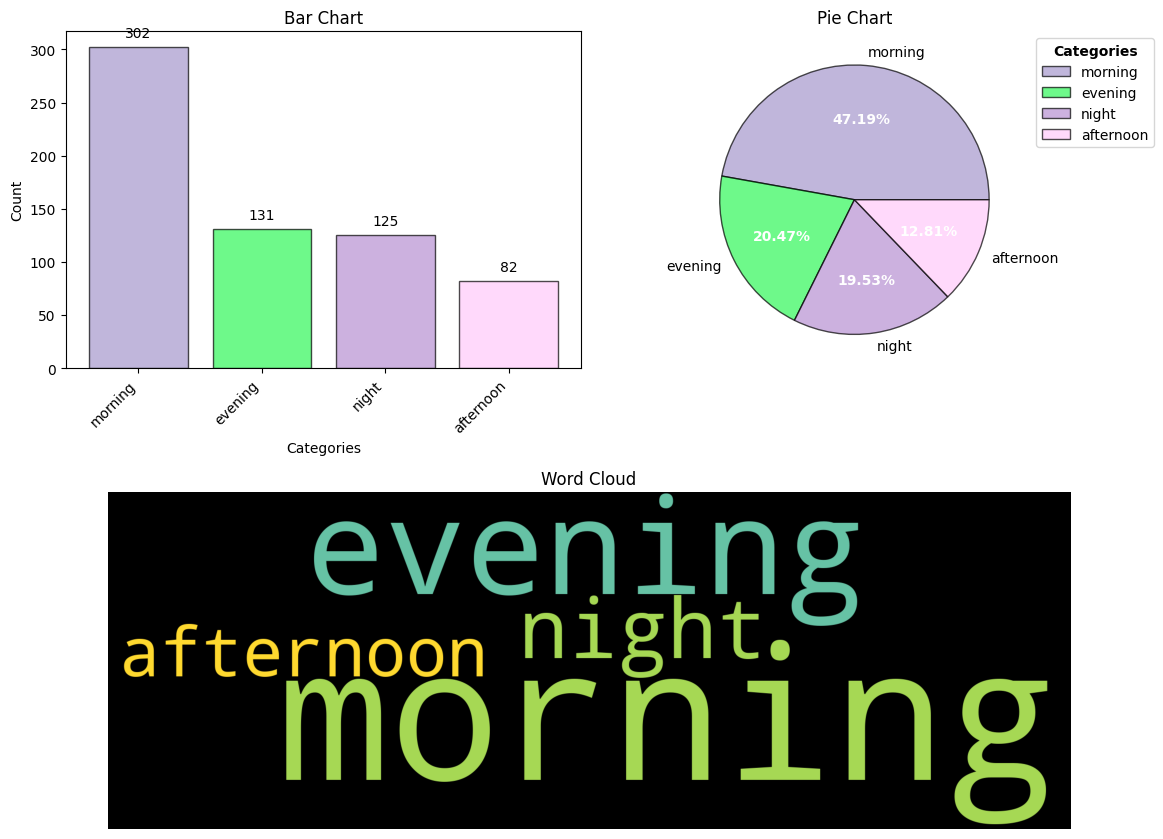

In [60]:
(
    train
    .assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
    ))
    .pipe(eda_helper_function.cat_univar_plots, 'dep_time')
)

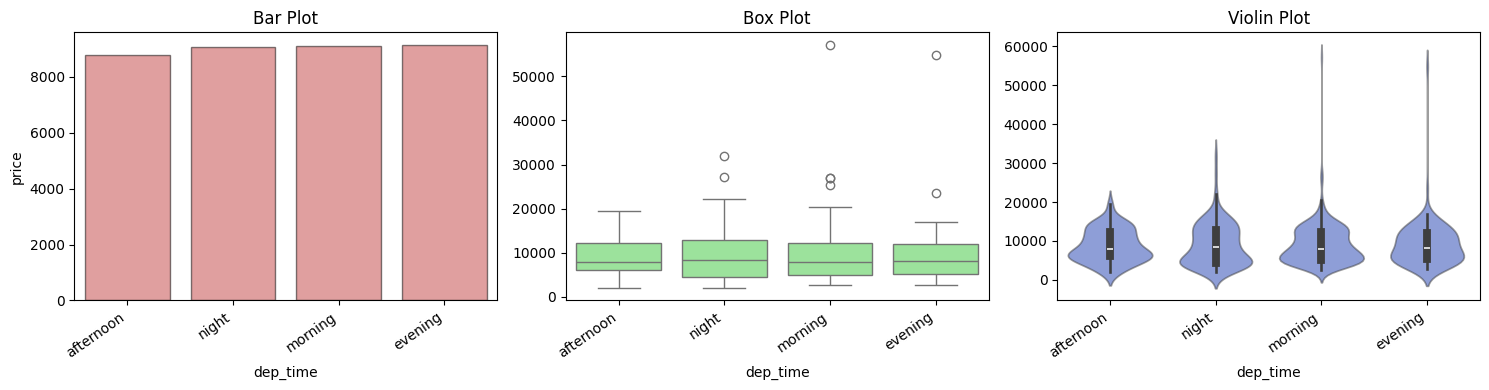

In [61]:
(
    train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
    .pipe(eda_helper_function.num_cat_bivar_plots, 'price', 'dep_time')
)

- from this bar plot we say slightly price is increases in the each part of the day, evening flights are more expensive than others

### 8.4 arrival_time

In [62]:
train.arrival_time

0     2024-07-20 20:45:00
1     2024-07-20 10:40:00
2     2024-07-20 08:20:00
3     2024-07-20 11:50:00
4     2024-07-20 12:35:00
              ...        
635   2024-07-20 10:25:00
636   2024-07-20 01:30:00
637   2024-07-20 17:20:00
638   2024-07-20 02:15:00
639   2024-07-20 20:45:00
Name: arrival_time, Length: 640, dtype: datetime64[ns]

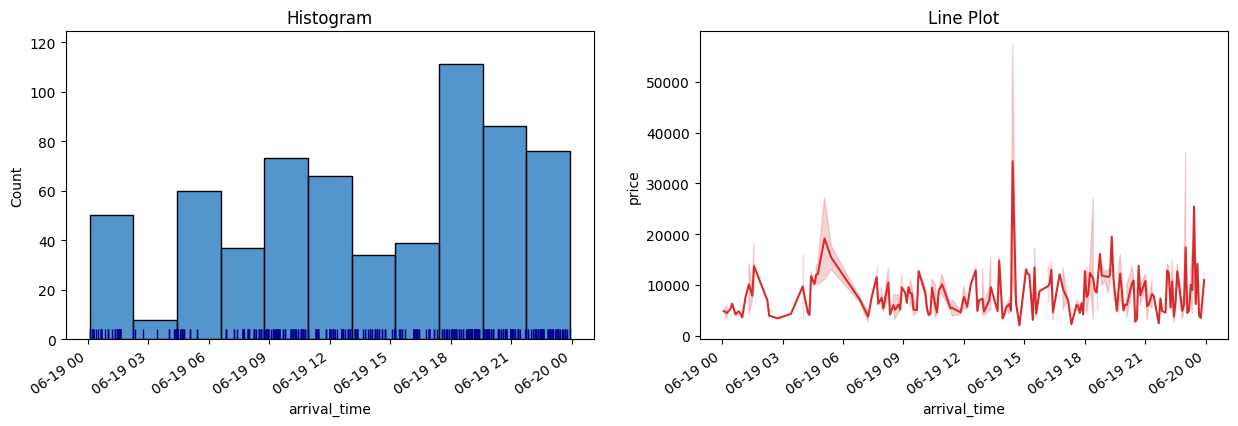

In [48]:
eda_helper_function.dt_univar_plots(train, 'arrival_time', 'price')

- From these plot we look the booking are done in such a way the travellers arrive at distination b/w 6:00 pm to 12:00 am is much high 

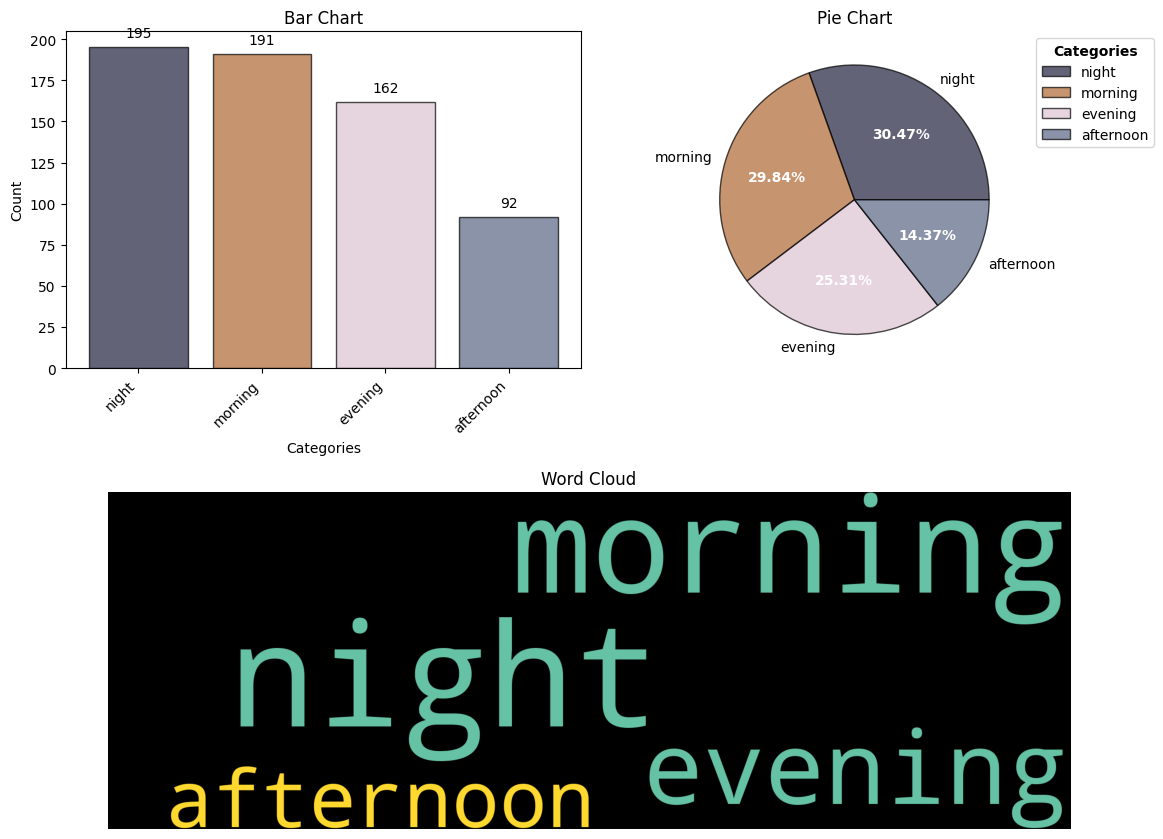

In [63]:
(
    train
    .assign(arrival_time=lambda df_: (
		np.select([df_.arrival_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.arrival_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.arrival_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
    ))
    .pipe(eda_helper_function.cat_univar_plots, 'arrival_time')
)

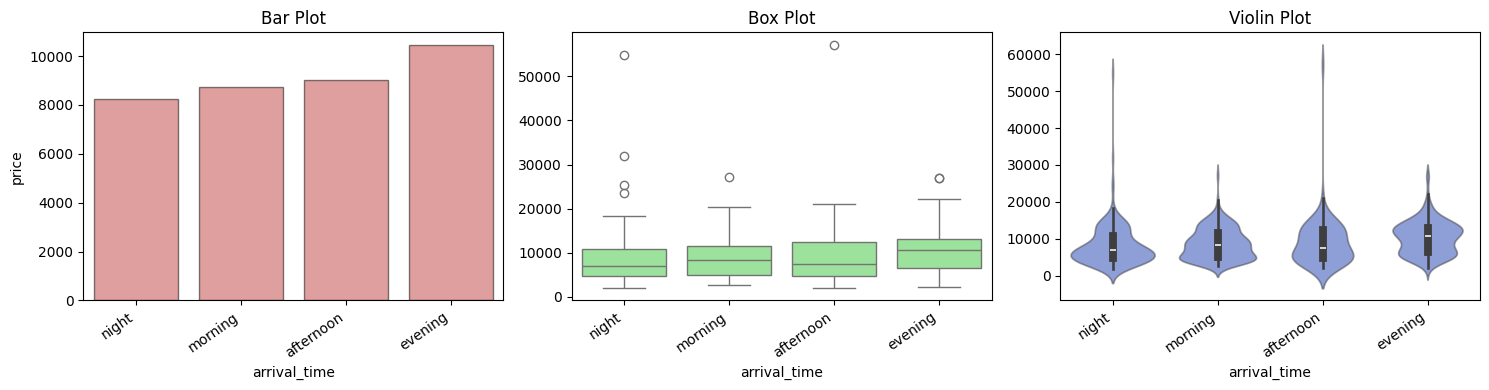

In [50]:
(
    train
    .assign(arrival_time=lambda df_: (
		np.select([df_.arrival_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.arrival_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.arrival_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
    ))
    .pipe(eda_helper_function.num_cat_bivar_plots,'price','arrival_time')
)

- same thing is happening like dep_time

### 8.4 duration

In [51]:
train.head(2)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-24,Kolkata,Banglore,2024-06-19 20:00:00,2024-06-19 20:45:00,1485,1.0,In-flight meal not included,10844
1,Goair,2019-04-03,Banglore,Delhi,2024-06-19 07:45:00,2024-06-19 10:40:00,175,0.0,No Info,4239


In [52]:
train.duration

0      1485
1       175
2       170
3        90
4      1295
       ... 
635    1050
636     390
637      90
638     315
639    1550
Name: duration, Length: 640, dtype: int64

In [69]:
eda_helper_function.num_summary(train, 'duration')

0      1485
1       175
2       170
3        90
4      1295
       ... 
635    1050
636     390
637      90
638     315
639    1550
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,175.00
50,492.50
75,930.00
90,1450.00
95,1580.50
99,1934.55


,value
mean,639.414062
trimmed mean (5%),605.659722
trimmed mean (10%),577.675781
median,492.500000


,value
var,263511.588847
std,513.333799
IQR,755.000000
mad,327.500000
coef_variance,0.802819


,value
skewness,0.859334
kurtosis,-0.246066


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.2030932111732141e-21
Test Statistic       : 0.8821211515251078
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 25.627541543699408
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [54]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    175.0
0.50    492.5
0.75    930.0
Name: duration, dtype: float64

- We use trimmed mean for escapping the extrim
- Variance and std have the impact of outliers becoze they are calculated using mean
- IQR and MAD(median absolute deviation) not impacted by outliers
- coef of variance equal to std/mean
- col is +vely skewed
- thin tail and flatter peak
- purpose of percentile is like 0 means the shortest flight in our data set is 75 minutes. 10 means 10 percent of flights have duration less than 150 minutes
- distance between mean and median is to high that also represent our data is not normally distributed

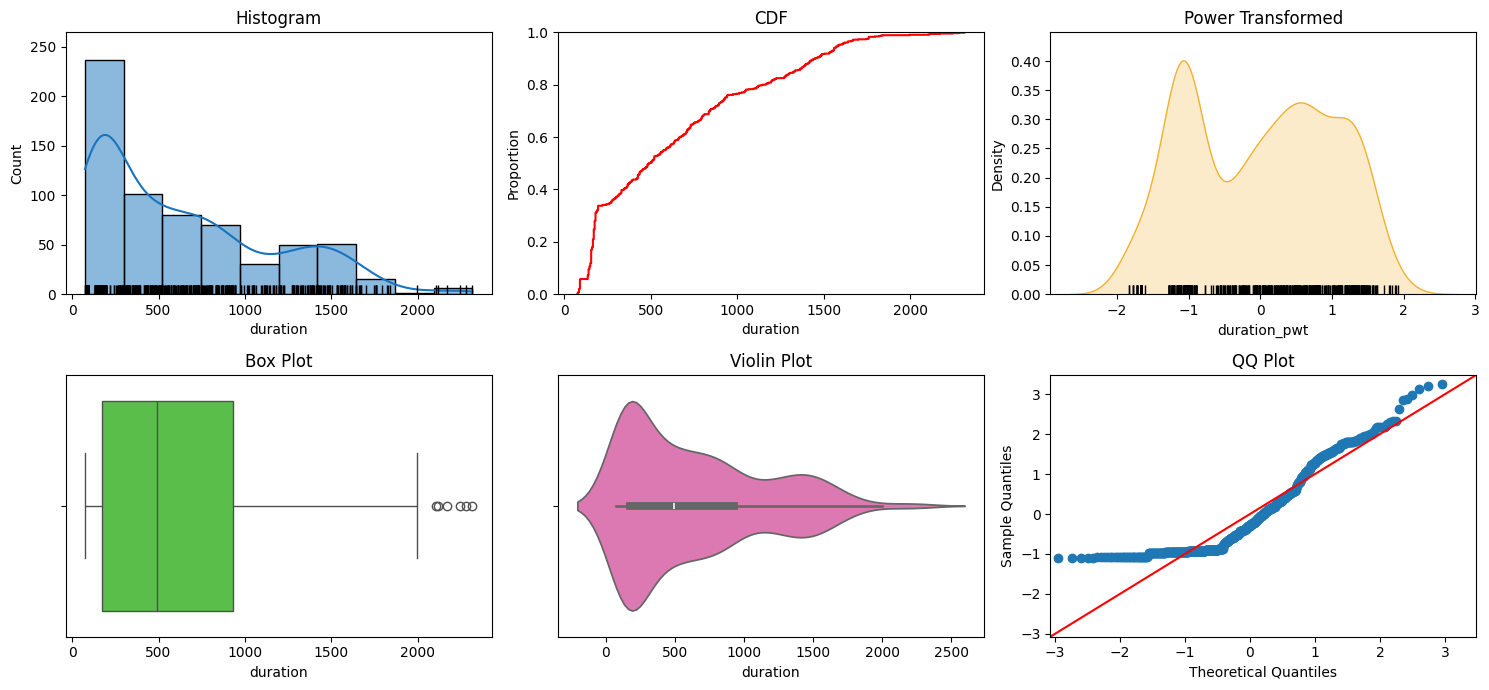

In [107]:
eda_helper_function.num_univar_plots(train, 'duration')

In [ ]:
eda_helper_function.num_univar_plots(train, 'duration')

In [121]:
# bivariate plots between 2 numeric variables
def num_bivar_plots(data, var_x, var_y, figsize=(12, 4.5), scatter_kwargs=dict(), hexbin_kwargs=dict()):
  display_html(2, f"Bi-variate Analysis between {var_x} and {var_y}")
  display_html(content="")

  fig, axes = plt.subplots(1, 2, figsize=figsize)

  # scatter plot
  sns.scatterplot(
      data,
      x=var_x,
      y=var_y,
      ax=axes[0],
      edgecolors="black",
      **scatter_kwargs
  )
  axes[0].set(title="Scatter Plot")

  # hexbin plot
  col_x = data.loc[:, var_x]
  col_y = data.loc[:, var_y]
  hexbin = axes[1].hexbin(
      x=col_x,
      y=col_y,
      **hexbin_kwargs
  )
  axes[1].set(
      title="Hexbin Plot",
      xlabel=var_x,
      xlim=(col_x.min(), col_x.max()),
      ylim=(col_y.min(), col_y.max())
  )
  cb = plt.colorbar(
      hexbin,
      label="Count"
  )

  plt.tight_layout()
  plt.show()



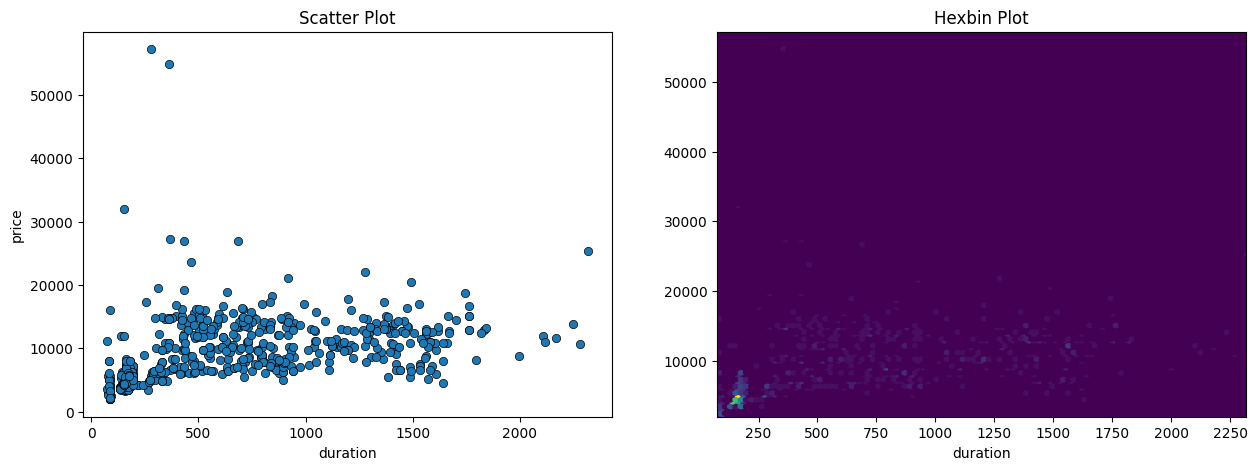

In [126]:
num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)


In [127]:
eda_helper_function.num_num_hyp_testing(train, 'price', 'duration')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4284520647701099
- p-value              : 5.8403320033708136e-30
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6833555068863816
- p-value              : 3.136784116809948e-89
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


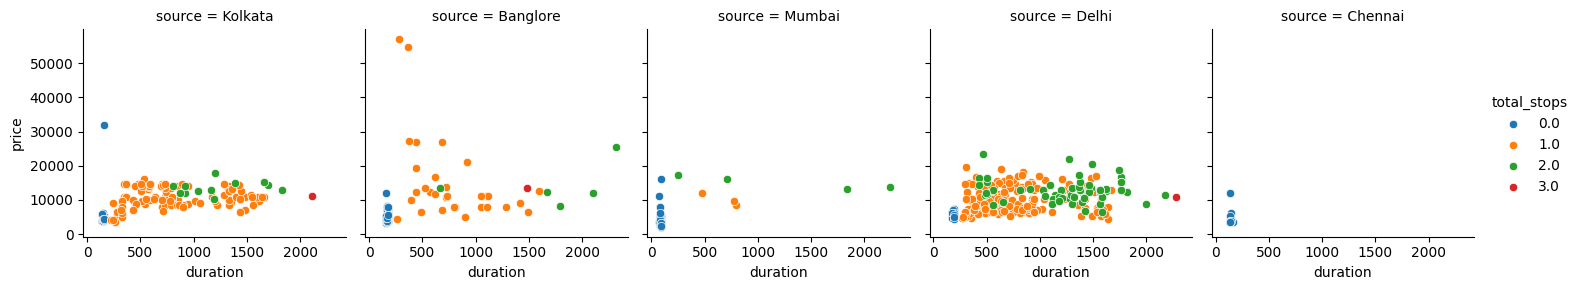

In [131]:
duration_grid = sns.FacetGrid(
    data=train,
    col='source',
    hue='total_stops',
    sharey=True
)

duration_grid.map(sns.scatterplot, 'duration', 'price')
duration_grid.add_legend()

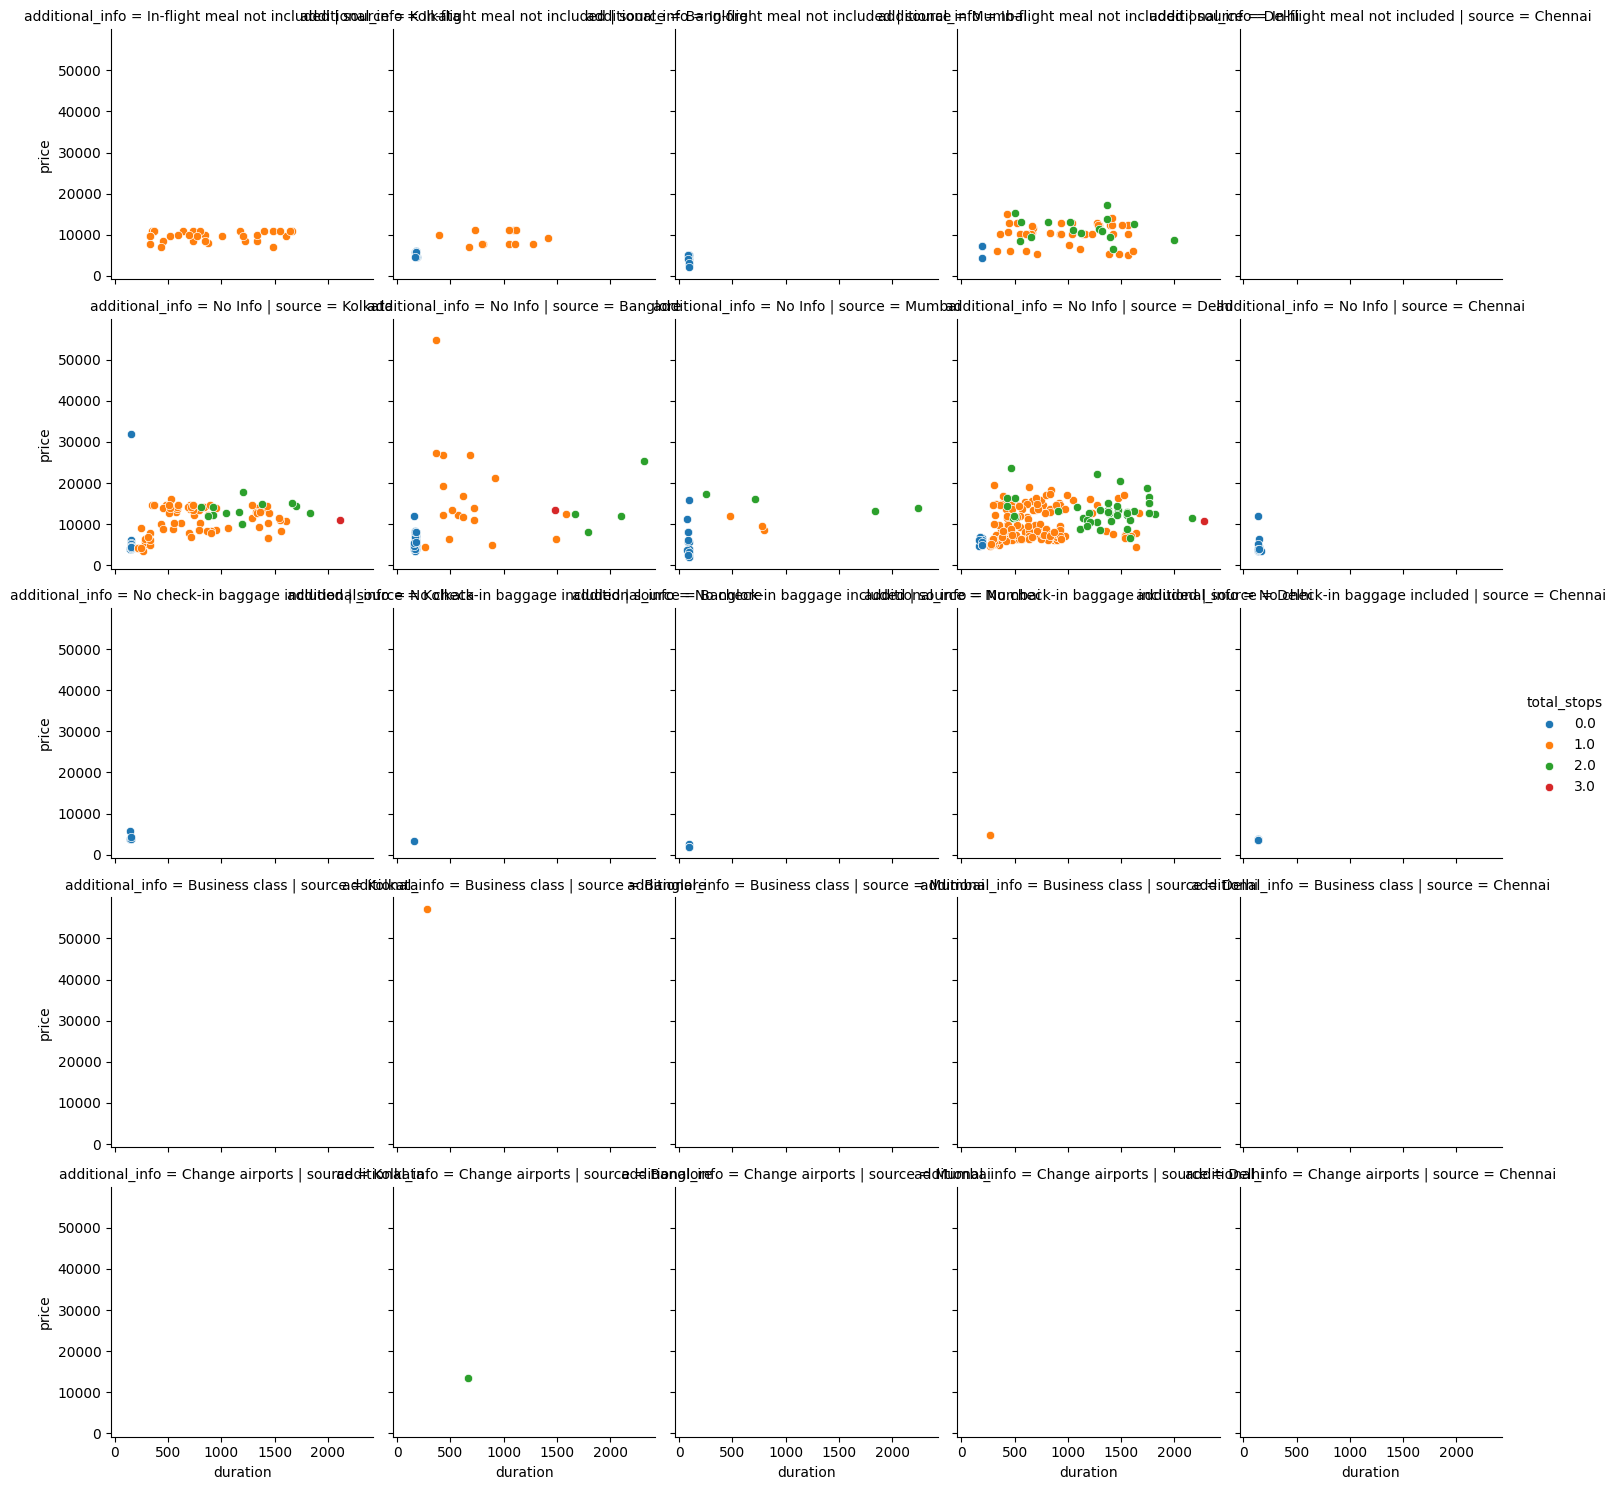

In [134]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [135]:
eda_helper_function.get_iqr_outliers(train, 'duration')

Lower Limit : -957.5
Upper Limit : 2062.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
111,Air India,2019-03-03,Banglore,New Delhi,2024-06-19 11:05:00,2024-06-19 22:10:00,2105,2.0,No Info,11948
456,Air India,2019-05-12,Kolkata,Banglore,2024-06-19 12:00:00,2024-06-19 23:15:00,2115,3.0,No Info,10991
197,Air India,2019-03-03,Delhi,Cochin,2024-06-19 07:05:00,2024-06-19 19:15:00,2170,2.0,No Info,11552
532,Air India,2019-03-06,Mumbai,Hyderabad,2024-06-19 06:00:00,2024-06-19 19:25:00,2245,2.0,No Info,13904
276,Air India,2019-05-09,Delhi,Cochin,2024-06-19 05:15:00,2024-06-19 19:15:00,2280,3.0,No Info,10703
129,Air India,2019-03-01,Banglore,New Delhi,2024-06-19 08:50:00,2024-06-19 23:25:00,2315,2.0,No Info,25430


## 8.5 Additional_info

In [136]:
eda_helper_function.cat_summary(train, 'additional_info')

0      In-flight meal not included
1                          No Info
2                          No Info
3      In-flight meal not included
4      In-flight meal not included
                  ...             
635    In-flight meal not included
636                        No Info
637    In-flight meal not included
638                        No Info
639    In-flight meal not included
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,No Info
freq,487


,count,percentage
category,,
No Info,487,0.760938
In-flight meal not included,131,0.204687
No check-in baggage included,20,0.031250
Business class,1,0.001563
Change airports,1,0.001563


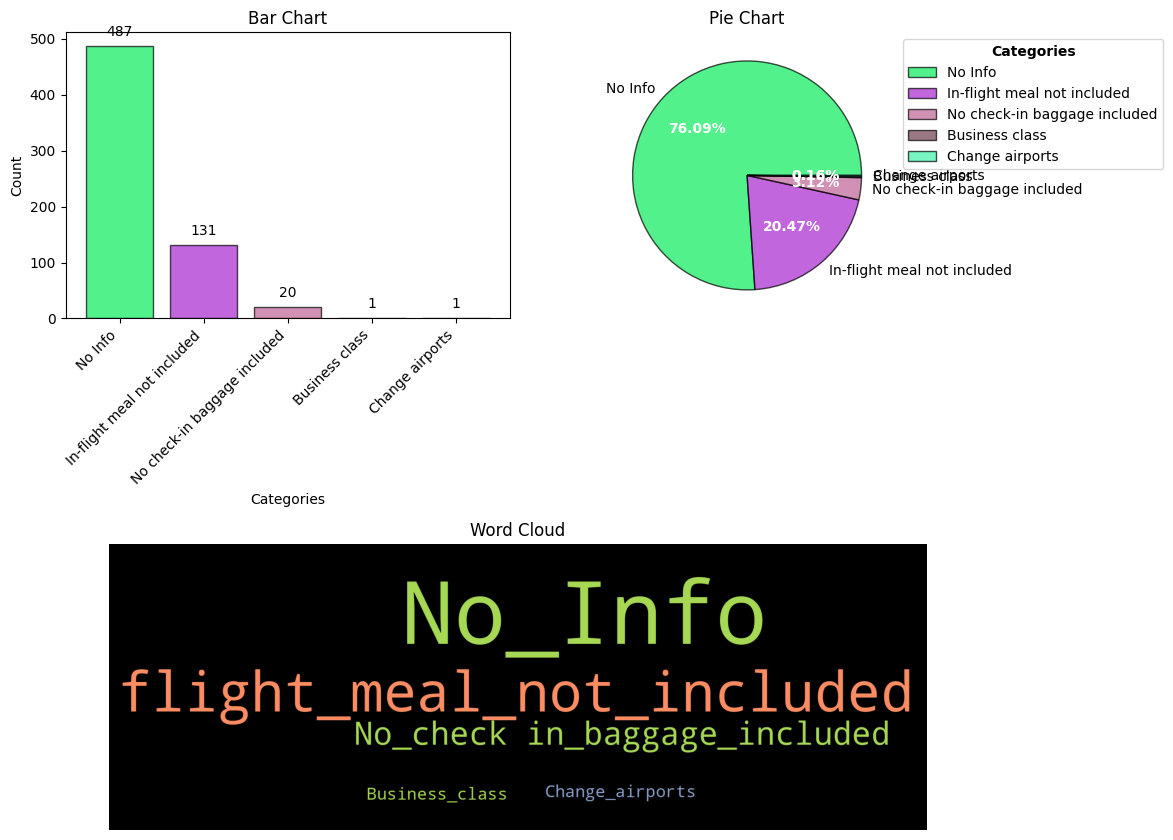

In [138]:
eda_helper_function.cat_univar_plots(train, "additional_info")

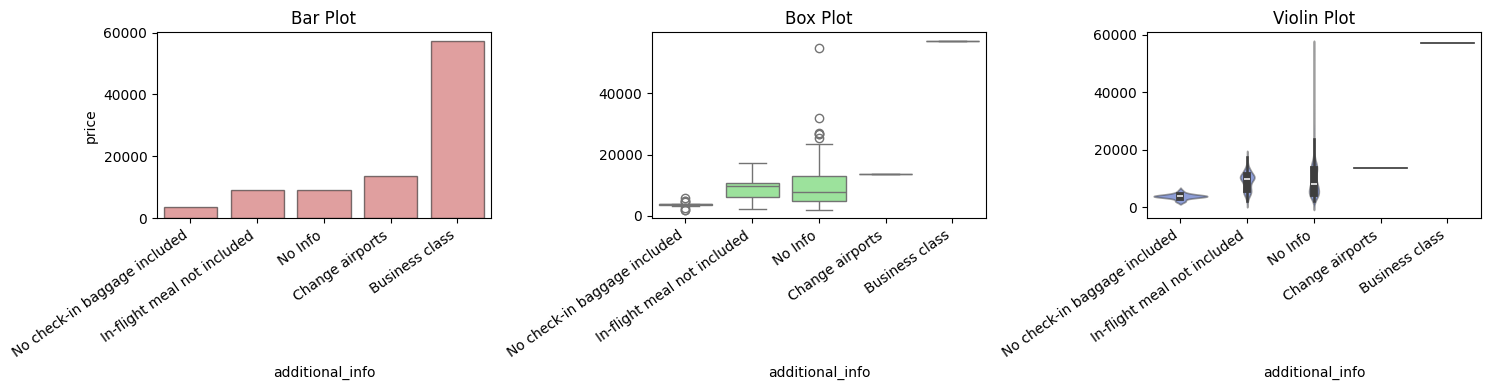

In [139]:
eda_helper_function.num_cat_bivar_plots(train, "price", "additional_info")

In [5]:
pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 4.3 MB/s eta 0:00:03
    --------------------------------------- 0.3/11.5 MB 3.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/11.5 MB 5.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.5 MB 5.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.5 MB 5.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/11.5 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/11.5 MB 5.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.5 MB 6.3 MB/s eta 0:00:02
   ------ --------------------------------- 2.0/11.5 MB 5.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.5 MB 5.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.5 MB 5.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.5 MB 5.8 MB/s eta 0:00:02
   ---


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.9 kB 960.0 kB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----------------------- ---------------- 174.1/294.9 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.4/8.0 MB 12.6 MB/s eta 0:00:01
   -- ------------------------------------- 0.5/8.0 MB 9.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.7/8.0 MB 6.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/8.0 MB 7.5 MB/s eta 0:00:01
   ------ --------------------------------- 1.2/8.0 MB 7.9 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/8.0 MB 7.2 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
